# Introduction

* The domain I selected for this project is my sleep data collected by an application on my AppleWatch called AutoSleep. This domain is important to me because unlike most of my peers, I am an early morning person. My body naturally wakes up around 6:30am without fail, unless I go to bed later than usual. The purpose of this research was to try to identify a correlation between when I go to sleep/wake up, and the efficiency rating of my sleep. 
* All of the datasets I used were in the format of a .csv file. 
* There are four tables in the dataset, one table contains all of the AutoSleep data from the first history export I made, beginning on January 27th and ending on April 12th. A second table contains data from April 13th to April 29th. Then there are two tables containing corresponding days of the week for each of the instances in the AutoSleep tables. 
* The data in the AutoSleep tables is collected through my AppleWatch, by sensing when I have put my phone down for the night, as well as monitoring my heart rate to determine when I have fallen asleep and what stage of the sleep cycle I am in. Meanwhile, I created the .csv files for the days of the week myself in excel using the 'fromDate' column from the respective AutoSleep files and a calendar to correctly label the days. 
* There are 48 instances in the first sleep table and its corresponding days of the week table, and 13 instances in the second table as well as its corresponding days of the week table. This is a combined total of 61 instances of sleep data and days of the week.  
* In the Autosleep tables, the following attributes were provided for each night's sleep:
    * From Date/To Date - the date the sleep session was recorded in
    * Bedtime / Waketime - the time you went to bed and awoke. Using Light Off feature gives a more accurate bedtime
    * InBed - how long you were in bed for, shown in hours, minutes and seconds
    * Awake - how long you were awake for, shown in hours, minutes and seconds
    * Fell Asleep - if you use the Lights Off feature, this will populate with the amount time it took you to fall asleep
    * Sessions - the number of sleep sessions recorded during the from and to date
    * Asleep / AsleepAvg7 - the sleep duration recorded along with the 7 day sleep duration average on that date
    * Efficiency / EfficiencyAvg7 - the ratio of time asleep versus time spent in bed along with the 7 day efficiency average
    * Quality / QualityAvg7 - quality considers how long you have slept, how restless you've been and your sleeping heart rate. It is shown as hours, minutes and seconds along with a 7 day sleep quality average
    * Deep / DeepAvg7 - where your heart rate slows and your muscles relax to a point where you barely move.  It is shown as hours, minutes and seconds along with a 7 day deep sleep average
    * SleepBPM / SleepBPMAvg7 - your average heart rate shown in beats per minute for the sleep, along with a 7 day average of your sleeping heart rate
    * DayBPM / DayBPMAvg7 - your average heart rate outside of your sleep, generally during the day for most users, shown in beats per minute, along with a 7 day average of your daily heart rate
    * WakingBPM / WakingBPMAvg7 - your waking pulse shown in beats per minute which is automatically captured by AutoSleep , along with a 7 day waking pulse average
    * HRV / HRVAvg7- your Heart Rate Variability that was automatically captured by the Apple Watch or using the breathe app. AutoSleep will use the maximum value where multiple values exist for the same date. This will also show a 7 day average of your HRV
    * SpO2Avg/ SpO2Min / SpO2Max - your Blood Oxygen that was automatically captured by the Apple Watch while you sleep. Remember that you need background measures enabled for automatic measurements while you sleep
    * Tags / Notes - any emoji tags or notes recorded will appear in the export
* The days of the week tables simply had two attributes: the day of the week, and the 'fromDate'. 
* In the dataset, I am trying to classify the efficiency of my nightly sleep sessions. 
* These results have the potential of showing me what length of sleep and heart rate(s) may or may not correspond to a more efficient night's rest. 
* The only stakeholder insterested in these results is myself, however if I were to find soemthing significant, it may be grounds for further research, which is when others might become interested, such as doctors and psychologists (although I highly doubt that 60 days worth of sleep tracking is going to produce anything)


In [7]:
import utils 
import importlib
importlib.reload(utils)
import pandas as pd
import numpy as np 

df = pd.read_csv("AutoSleep.csv", header=0)
days_df = pd.read_csv("days_of_week.csv", header=0)

df_2 = pd.read_csv("AutoSleep_part2.csv", header=0)
days_part_2 = pd.read_csv("days_test.csv", header=0)
join = [df, df_2]
join_days = [days_df, days_part_2]

df = pd.concat(join)
days_df = pd.concat(join_days)

for col in df:
    check_for_nan = df[col].isnull().values.any()
    if check_for_nan == True:
        # print (col, check_for_nan, df[col].isnull().count())
        df.drop(col, axis=1, inplace=True)

df.drop(['ISO8601', 'toDate', 'inBed',
       'awake', 'fellAsleepIn', 'sessions', 'asleepAvg7', 'efficiencyAvg7', 
       'qualityAvg7', 'sleepBPMAvg7', 'wakingBPMAvg7','hrvAvg7'], axis=1, inplace=True)


merged_df = days_df.merge(df, on='fromDate')

# Data Analysis 

* The dataset didn't need much cleaning. There were a few columns that were completely empty or because data was unique to each column (dates and times) or was irrelevant to the classification goal and as such, the following columns were removed from the dataframe:  
 
|Empty|Unique/Irrelevant|
|---|---|
|deep|ISO8601|
|deepAvg7|toDate|
|dayBPM|inBed|
|dayBPMAvg7|awake| 
|SpO2Avg|fellAsleepIn| 
|SpO2Min|sessions|
|SpO2Max|asleepAvg7|
|respAvg|efficiencyAvg7| 
|respMin|qualityAvg7| 
|respMax|sleepBPMAvg7| 
|tags|wakingBPMAvg7|
|notes|hrvAvg7|

* I merged the tables on the 'fromDate' column to accurately line up all of the sleep data with the day of the week I fell asleep on. 
* The only challenge with preparing the data was finding ways to compute statistics with the time stamps. I found a way to use functions
that could convert an entire column of data into seconds and then if I wanted to, I could put it into a second function to get a string
with how many hours, minutes, and seconds it broke down to (this was particularly helpful when looking at the 'asleep' column).
* I used the split-apply-combine technique to aggregate my data by day. It was split into 7 different groups, then statistical analyses
were performed on each group, before combining these results into a pandas Series.
* When setting up visualizations, I used a bar chart to map the day of the week against the amount of sleep (in seconds), as well as a scatter chart to see if there was any correlation between the day of the week and my heart rate variability (hrv) - there was not. Lastly, I did a rather large line chart (below) to visualize the trends for sleepBPM, efficiency, and hrv simultaneously for each night my sleep was tracked - some days had a much more obvious correlation than others. This line chart is really interesting because there are some instances where the attributes all dip or climb at the same time, such as between March 6th and March 9th. 
* For the hypothesis testing, I wanted to know if sleeping longer would earn me a better efficiency rating. The null hypothesis was essentially stating that these two values are not correlated, whereas the alternative hypothesis claimed that more sleep does in fact increase the efficiency rating. Using a two-sample independent hypothesis with a level of significance of 0.05, the null hypothesis was rejected, so while I cannot say for certain that there IS a correlation between these two attributes, I can say that there is not no correlation.


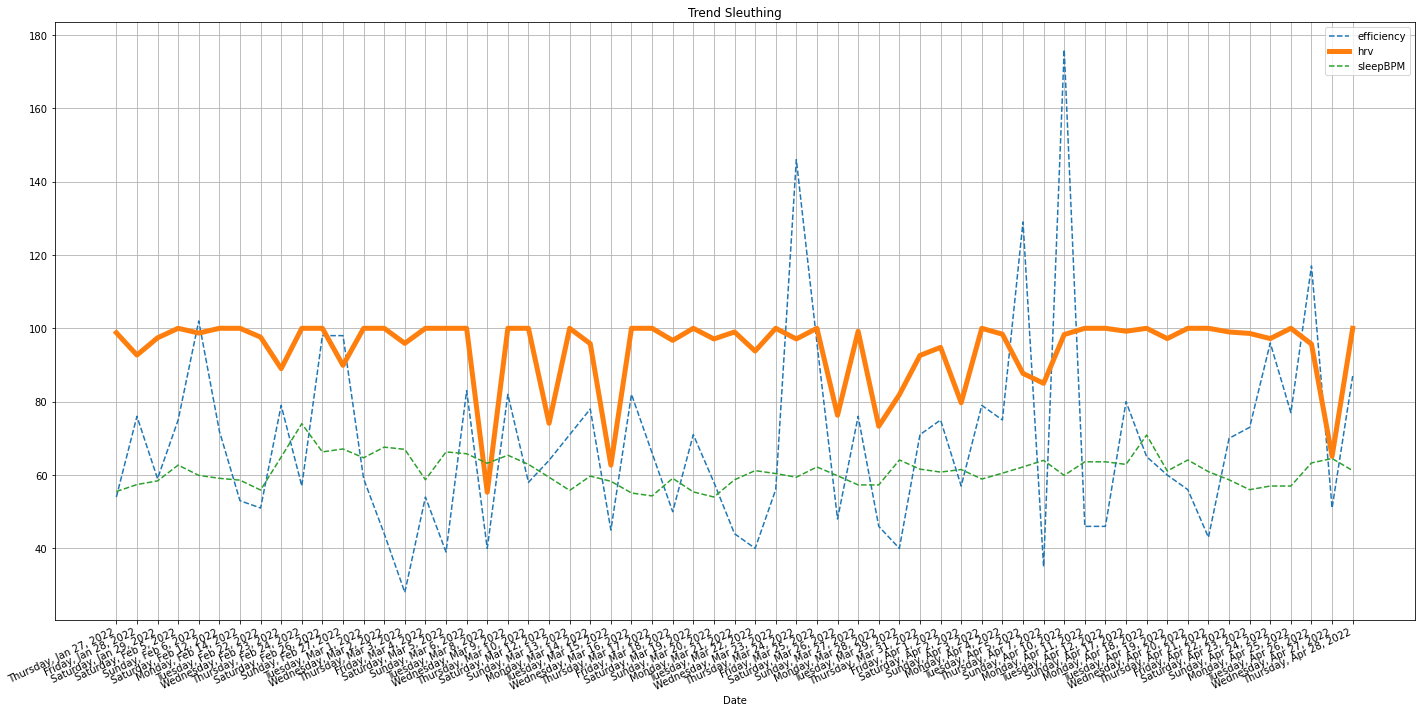

In [8]:
import matplotlib.pyplot as plt
utils.line_chart_example(merged_df['fromDate'], merged_df['efficiency'], merged_df['hrv'], merged_df['sleepBPM'],
                        "efficiency", "hrv", "sleepBPM")

# Classification Results

* For this classification, I wanted to predict efficiency scores for my sleep using the 'efficiency' attribute from my AutoSleep dataset.
* The distribution of the class labels is between 55 and 100. The 25th percentile of the data is at 92.675%, while the 50th percentile is 98.55%, and the 100th percentile maps to 100%. In other words, almost all of the efficiency scores lie between 90 and 100. 
* My hypothesis is that with the optimal classification algorithm, there will be more success in predicting the upper 95-100% efficiency scores than the lower values. 
* I evaluated my kNN and decision tree classifiers using the score library in sklearn. The kNN and desicion tree classifiers both had a decent but pretty low score of 0.166 which reflected the fact that only 1 out of 6 guesses were correct. The main reason why the predictions are so challenging is because I am not working with a binary. The predictions are based off of 20 unique efficiency scores rather than just a simple 'yes' or 'no'. 
* In general, challenges with classification can arise when dealing with a smaller dataset because there are often less training instances to run through the different ML models. I found it particularly difficult to get a good prediciton from a kNN classifier while using the holdout method where 10% of the data was withheld for testing purposes (only 1 out of 6 instances were predicted correctly). 
    * For me, classification was a never ending challenge of error messages. Trying to do a classification using the split_train_test module was impossible. I kept getting an error saying there was only 1 member in y and there needed to be 2, and no amounts of scouring stackoverflow to try the things that worked for everyone else seemed to make a difference. For this reason, the classifications in my project use a simple holdout method.

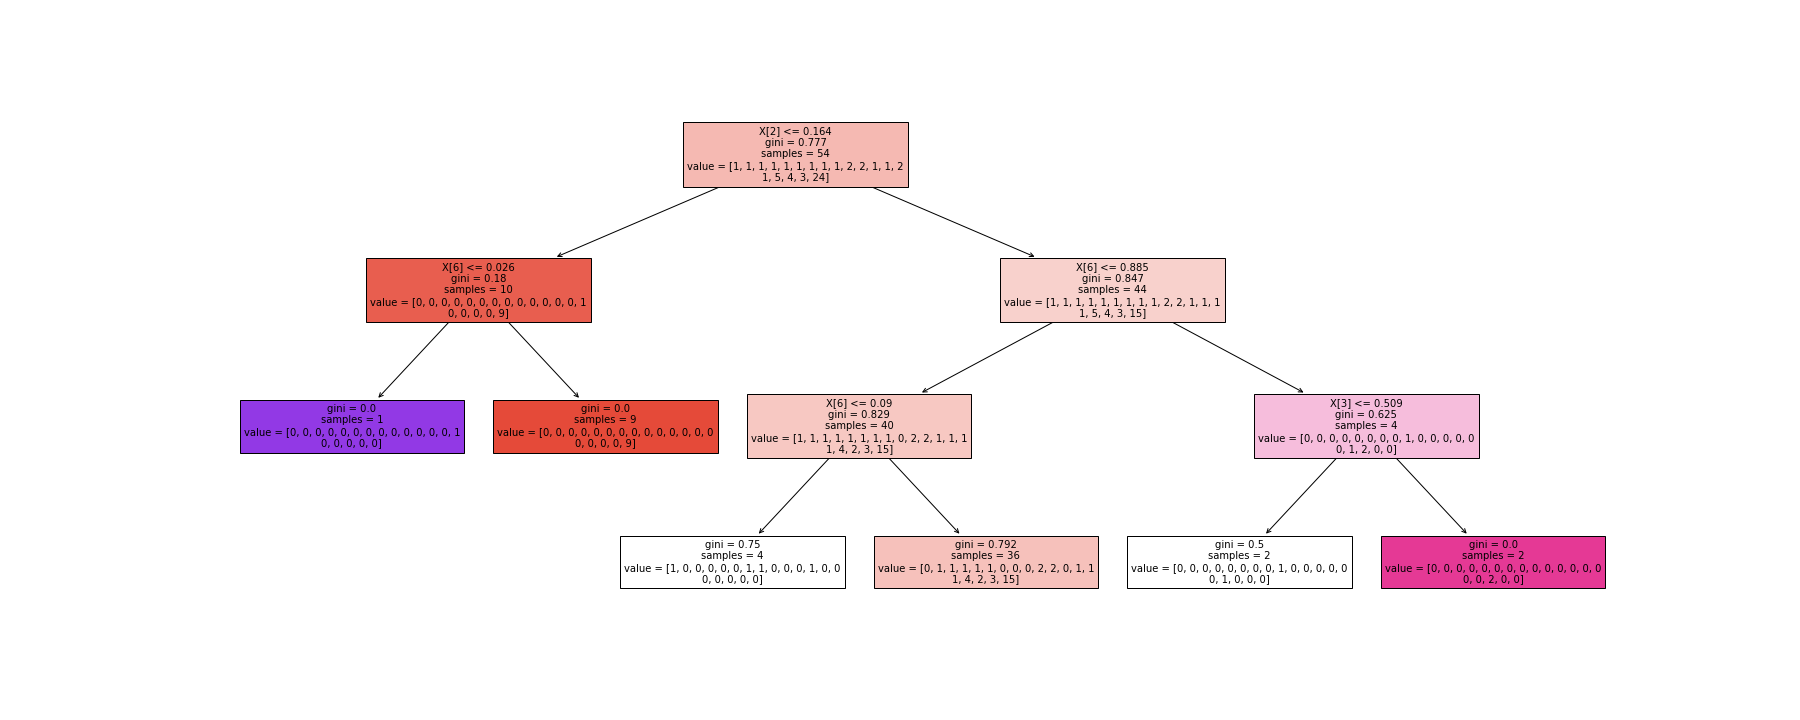

In [9]:
from IPython import display
display.Image("decision_tree.png")

# Conclusion 

* To summarize, the dataset I used for this project was from AutoSleep. It tracks my sleep through various metrics, and even generates an efficiency rating. While I did not wear my watch consistently over the last four months, I was able to get 61 instances between January of 2022 and April of 2022 to use for this project. The most notable attributes collected by my sleep tracker were the times I went to sleep/woke up, how long I was asleep, heart rate metrics, and of course, the efficiency. 
* The classification approach I developed was caused by an inability to run my code using the `train_test_split` option. After much trial and ultimate error messages, I decided to stick with the holdout method. While this is not the most ideal approach, especially with smaller datasets, where it is desirable to have as much training as possible, I was able to walk away with the knowledge that the efficiency of my sleep is not a cut-and-dry rating. There are many complex factors that go into it. If I had extra time and energy to devote to this project, I would try to see if adding the time I fell asleep added to the accuracy of the data. Similarly, I wonder if waking up early or late has an effect on the score. 
* The potential impacts of this project do not extend far beyond myself. I will say that I am more inclined to ask some of my friends who also use AutoSleep to track their sleep cycles to see what their data looks like and how it compares to my own. With only 61 instances and minimally significant correlations, I cannot see this being grounds for further research. Many more instances of my own data as well as many other people's would need to be collected in order for this to have the potential to point towards something groundbreaking. 
* I want to close by reflecting on the importance of ethics in data science because after taking this class in conjunction with philosophy of technology, it is crazy how unregulated and immature the realm of data collection, analysis, and science are. While I have enjoyed being able to do this research using my own data, I have developed a new value for privacy. In this new age of technology where privacy isn't even a term that can describe what is or isn't public, there needs to be a much more thoughtful approach to data collection that is less profit-focused. 